In [1]:
%load_ext autoreload
%autoreload 2
from dpe import DPE
from lib_data import *
import matplotlib.pyplot as plt
import numpy as np
from lib_nn_dpe import NN_dpe
from IPython import display

import serial
%config InlineBackend.figure_formats = ['svg']

import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Arial"

In [2]:
dpe = DPE('COM3')
dpe.set_clock(50)
dpe.shape

DAC initialized to a span from -10 V to 10 V
Setting vrefs to default
Setting ADC_CK freq=50000.0kHz
Setting CK_ARRAY freq=50000.0kHz


[64, 64]

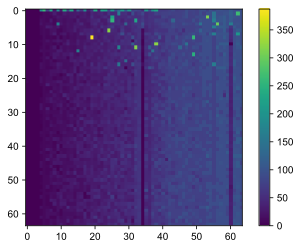

In [3]:
g = dpe.read(1, Tdly=500, method='fast')
plt.imshow(g * 1e6)
plt.colorbar()

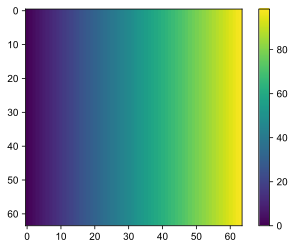

In [15]:
N = 64

Gtarget = np.zeros((N,N))
for c in range(64):
    Gtarget[:,c] = 100e-6 / 64 * c

Msel = Gtarget > 0

plt.imshow(Gtarget * 1e6); plt.colorbar()

In [6]:
import time

g_all = []
t_all = []
ts = time.time()

for i in range(10_000):
    g = dpe.read(1, method='fast')
    g_all.append(g)
    t_all.append(time.time() - ts)
    
    if i%100 == 0:
        display.clear_output()
        print(i)
    
g_all = np.array(g_all)
t_all = np.array(t_all)

save_workspace(vars(), note='10k_read')

9900
Saving In(<class 'list'>), Out(<class 'dict'>), g(<class 'numpy.ndarray'>), g_all(<class 'numpy.ndarray'>), t_all(<class 'numpy.ndarray'>), ts(<class 'float'>), i(<class 'int'>), to 20200109-222816-10k_read.pkl
Saving In(<class 'list'>), g(<class 'numpy.ndarray'>), g_all(<class 'numpy.ndarray'>), t_all(<class 'numpy.ndarray'>), ts(<class 'float'>), i(<class 'int'>), to 20200109-222816-10k_read.mat


In [95]:
g_new = g_all.reshape(g_all.shape[0], -1)

g_std = np.std(g_new, axis=0)
g_std.shape

# g_std[g_std<0.01*1e-6] = np.nan # quantization problem

(4096,)

Text(0, 0.5, 'Count')

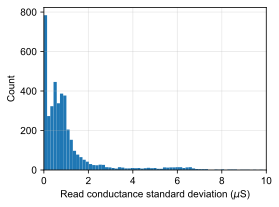

In [96]:
plt.figure(figsize=(4,3))
plt.hist(g_std * 1e6, 100)
plt.xlim(0, 10)
# plt.yticks(range(10))
plt.grid(True, alpha=.3)

plt.xlabel('Read conductance standard deviation ($\mu$S)')
plt.ylabel('Count')

(0, 1)

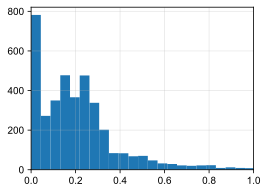

In [94]:
plt.figure(figsize=(4,3))
plt.grid(True, alpha=.3)

g_new = g_all.reshape(g_all.shape[0], -1)
g_new = g_new.reshape(10, -1, g_new.shape[-1])
g_new = np.mean(g_new, axis=0)
g_std = np.std(g_new, axis=0)

plt.hist(g_std * 1e6, 100)
plt.xlim(0, 1)

Text(0, 0.5, 'Cumulative probablity')

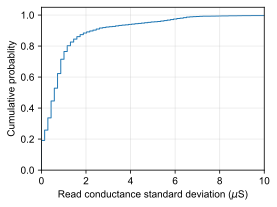

In [102]:
plt.figure(figsize=(4,3))
plt.hist(g_std * 1e6, 100, density=True, histtype='step', cumulative=1)
# plt.hist(g_std * 1e6, 100, density=True)
plt.xlim(0, 10)
# plt.yticks(range(10))
plt.grid(True, alpha=.3)

plt.xlabel('Read conductance standard deviation ($\mu$S)')
plt.ylabel('Cumulative probablity')